In [1]:
%load_ext autoreload
%autoreload 2
from Network import Network
from FrankWolf import *
from EntropyMaximisation import *
from RemoveBraess import *

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Identification of Braess links in traffic Networks - Finding braess links

In this notebook, we reuse the previous results to finally test our hypothese :

$$
x_{ij}^{UE,\ od} > 0 \textrm{ and } x_{ij}^{SO,\ od} = 0 \Rightarrow \textrm{Link (i, j) is a Braess link for OD (o, d)}
$$

Where :
- $x_{ij}^{UE/SO,\ od}$ represent the flow on the link from node $i$ to node $j$, that is caused by the trafic going from origin $o$ to destination $d$, at User Equilibrium, respectively at System Optimum

In [ ]:
net = Network("SiouxFalls")
UE_OD_flows = net.load_flow("UE_OD_flows")
SO_OD_flows = net.load_flow("SO_OD_flows")

Text(0.5, 1.0, 'System Optimum')

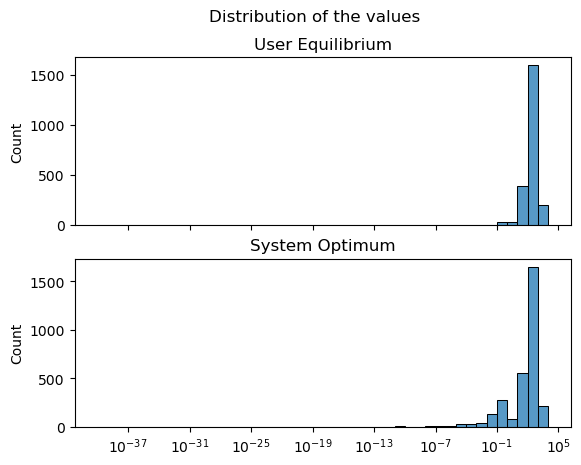

In [7]:
# Visualisation
fig, axes = plt.subplots(2, 1, sharex=True)
sns.histplot(x=UE_OD_flows[(UE_OD_flows>0)], bins=np.arange(-40, 5, 1), log_scale=True, ax=axes[0])
plt.suptitle("Distribution of the values")
axes[0].set_title("User Equilibrium")
sns.histplot(x=SO_OD_flows[(SO_OD_flows>0)], bins=np.arange(-40, 5, 1), log_scale=True, ax=axes[1])
axes[1].set_title("System Optimum")

## Mask : no threshold

In [12]:
mask = (UE_OD_flows > 0) & (SO_OD_flows == 0)
mask.sum()

135

In [ ]:
try_removing_braess(net, mask, save_folder="files/masked/no_threshold", export_folder="exports/masked/no_threshold")

  0%|          | 0/37 [00:00<?, ?it/s]

 32%|███▏      | 12/37 [13:03<32:16, 77.45s/it]

In [ ]:
for threshold in range(-4, 1):
    mask = (UE_OD_flows > 0) & (SO_OD_flows <10**threshold)
    mask.sum()
    
    print(f"Threshold : {10**threshold}, mask.sum : {mask.sum()}")

    try_removing_braess(net, mask, save_folder="files/masked/threshold_{threshold}", export_folder="exports/masked/threshold_{threshold}")

137

## Threshold

In [28]:
len(UE_OD_flows[(UE_OD_flows<1) & (UE_OD_flows>0)])

5178

In [ ]:
mask.sum(axis=2)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  2,  2,  0,  0,  0,  0,  2,  0,
         7,  0,  6,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  5,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

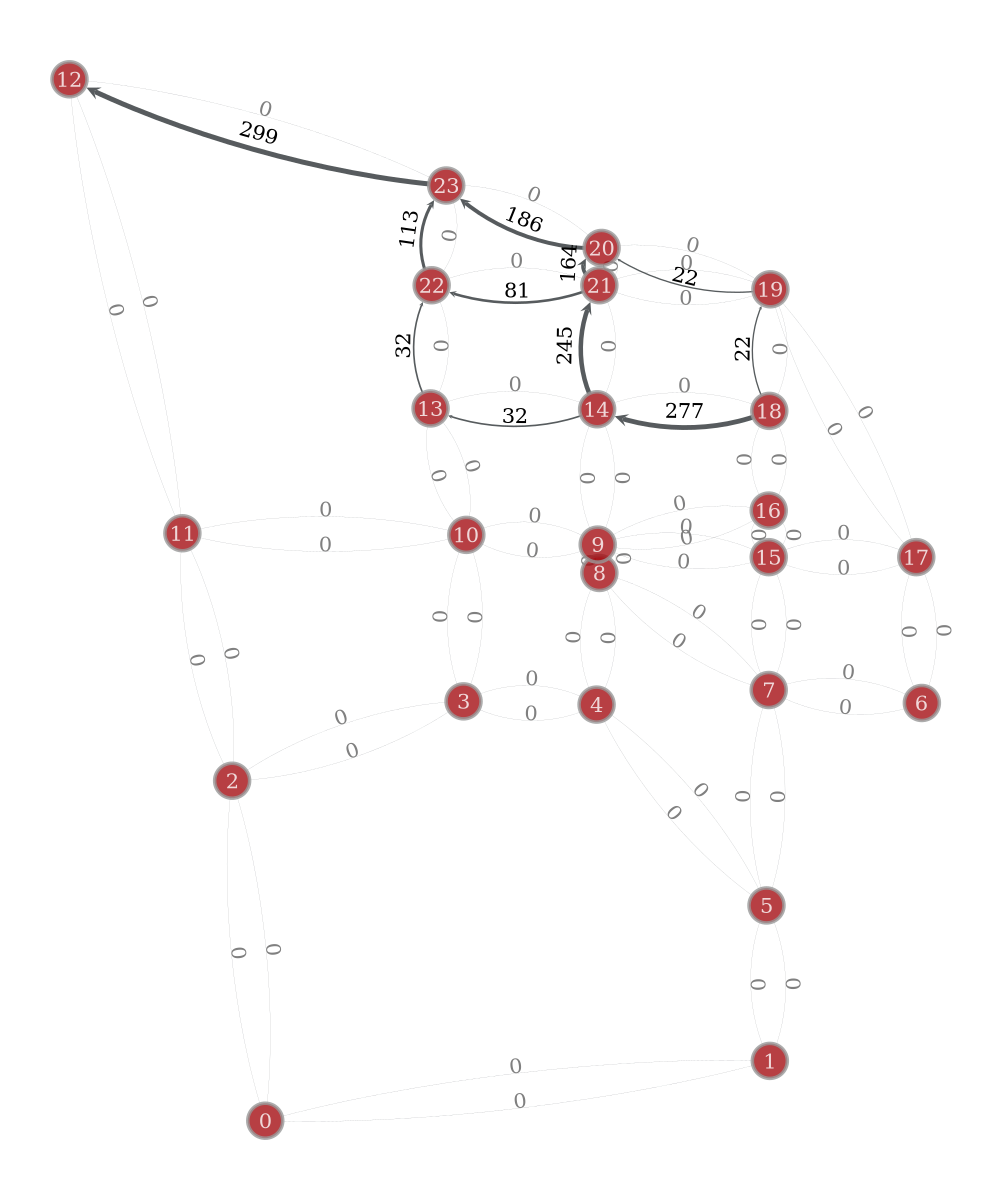

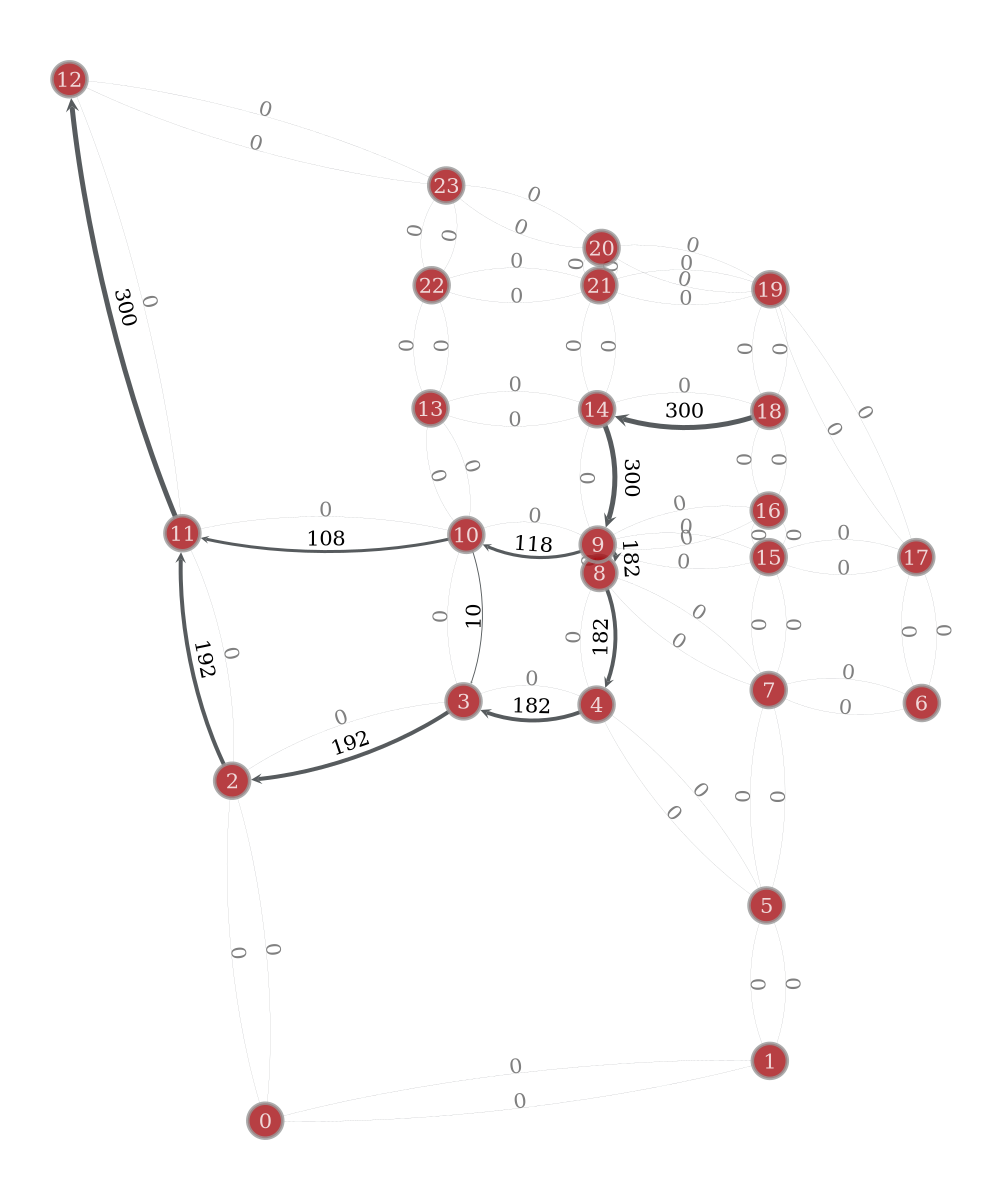

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8aabac60>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b8db3e0>)

In [ ]:
net.draw(flows_by_OD=OD_flows, d=12, o=18), net.draw(flows_by_OD=OD_SO_flows, d=12, o=18)

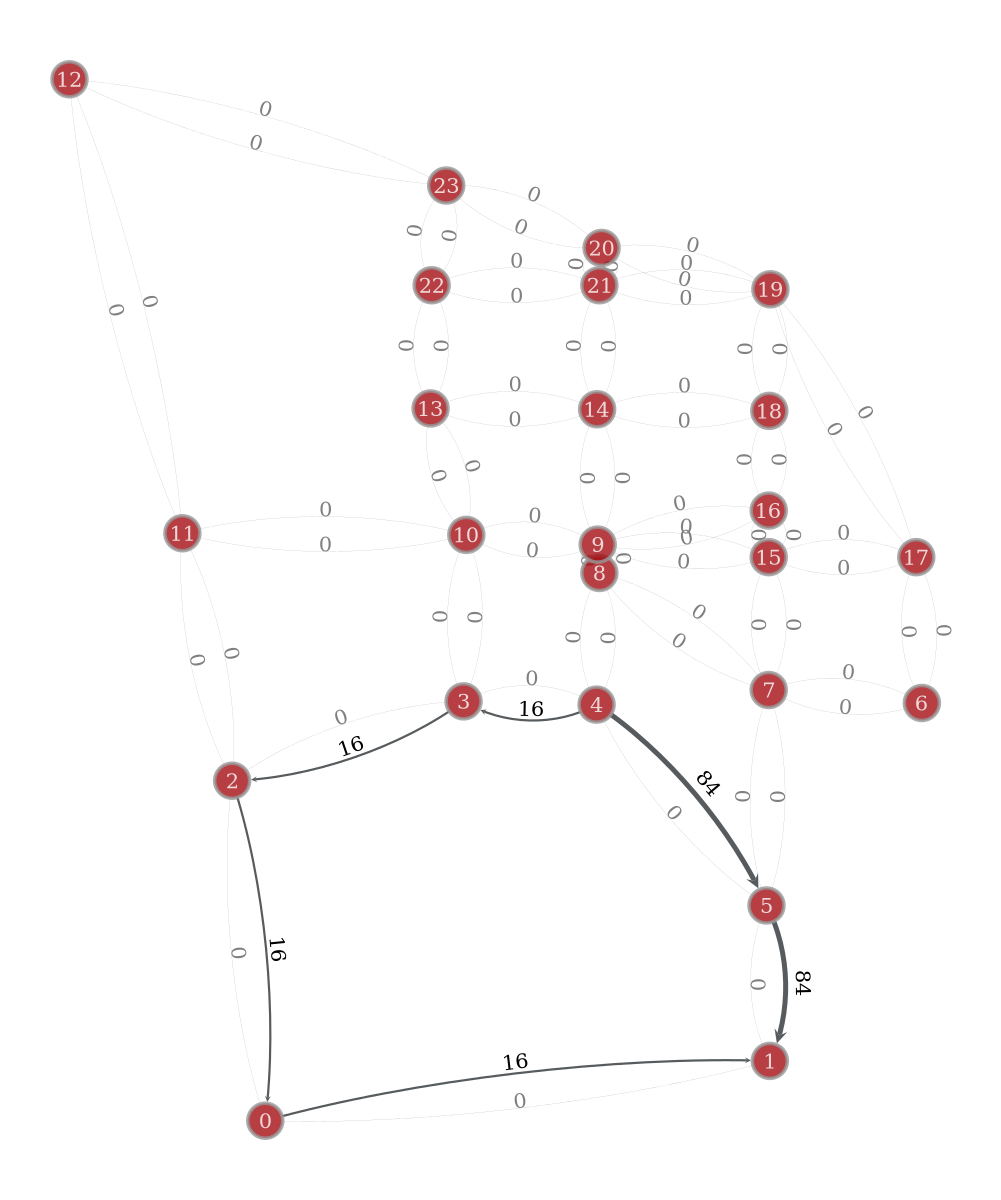

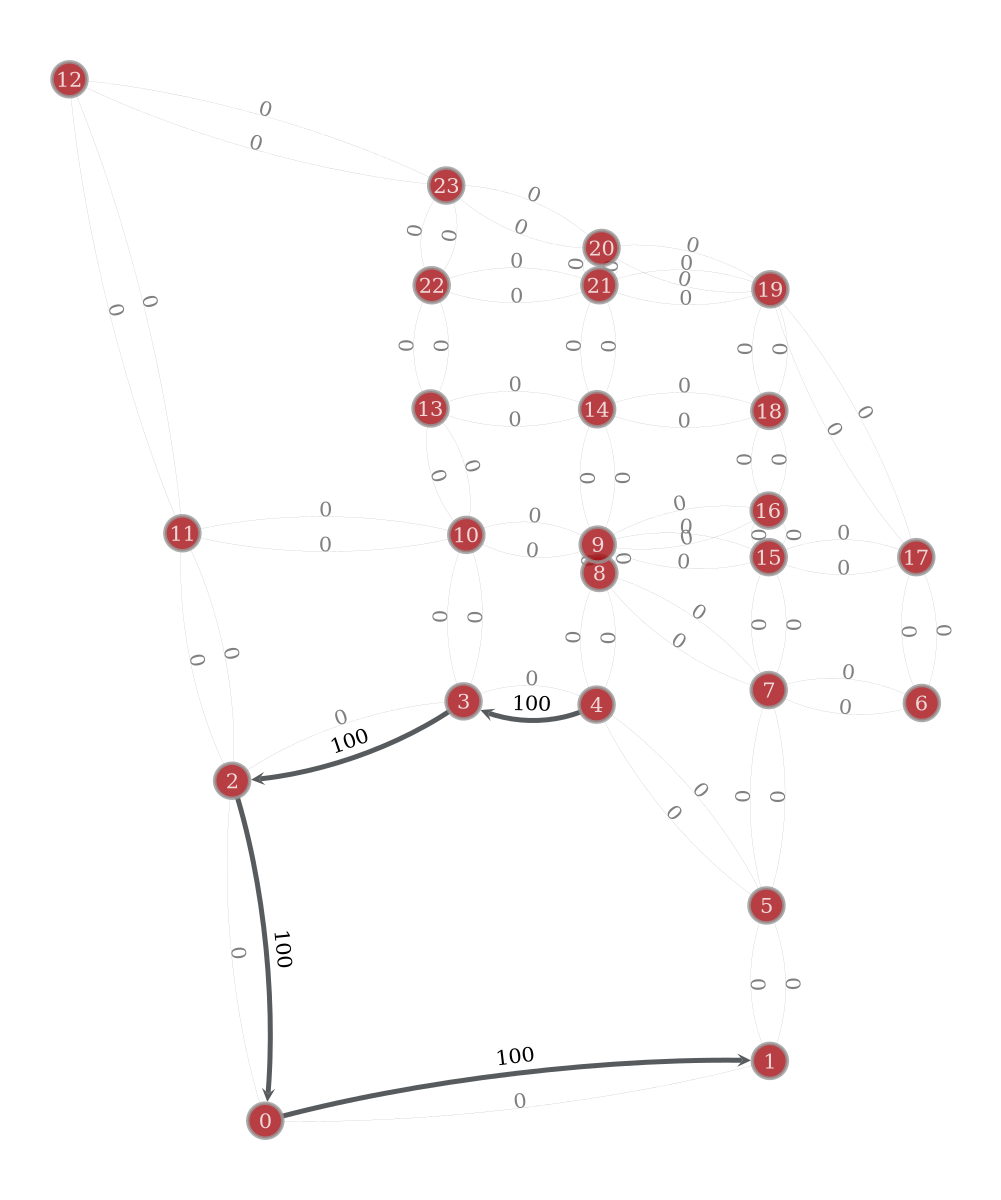

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b9ce6f0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b97fcb0>)

In [ ]:
net.draw(flows_by_OD=OD_flows, d=1, o=4), net.draw(flows_by_OD=OD_SO_flows, d=1, o=4)

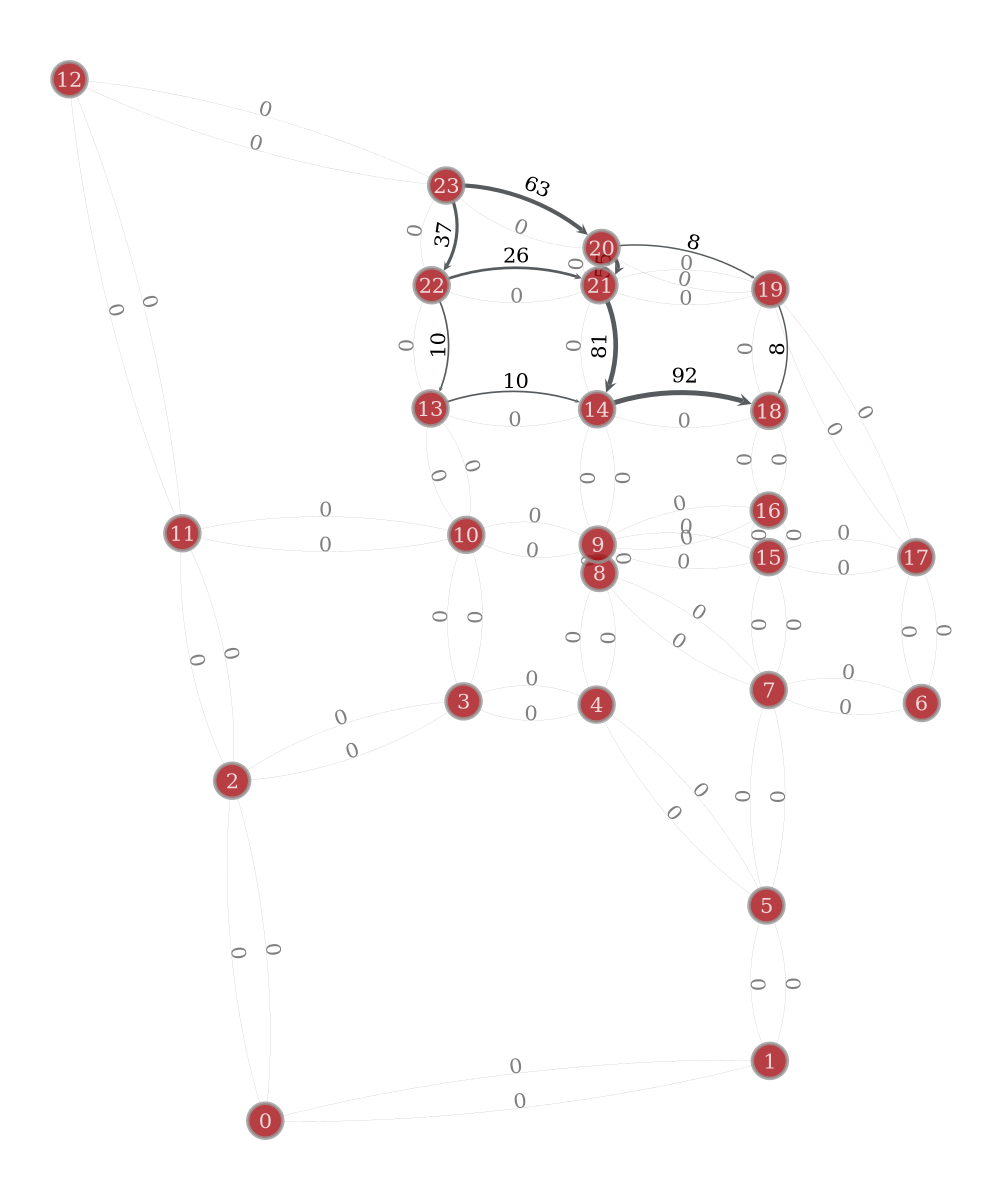

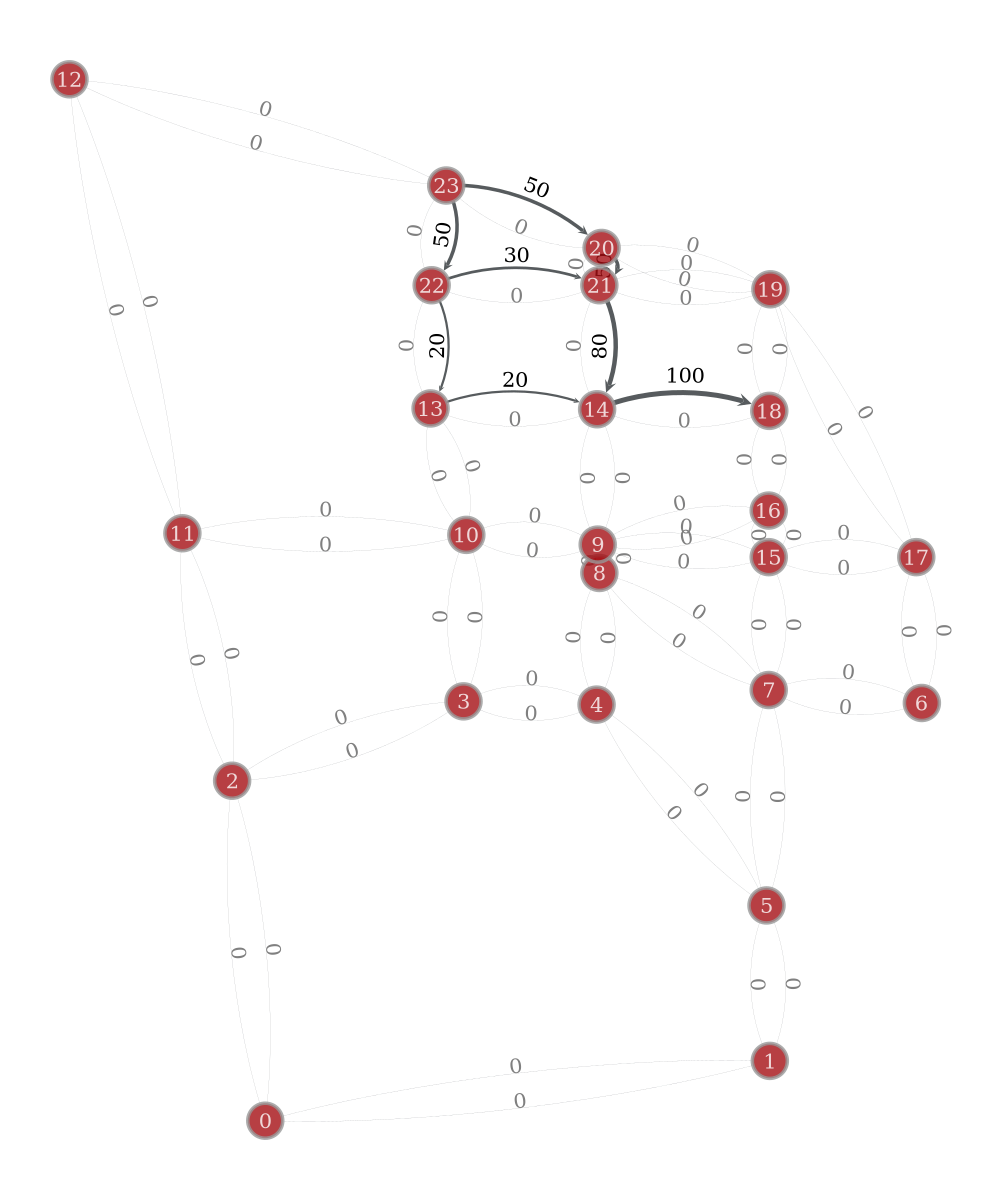

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8aabb320>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b9cd850>)

In [ ]:
net.draw(flows_by_OD=OD_flows, d=18, o=23), net.draw(flows_by_OD=OD_SO_flows, d=18, o=23)

In [ ]:
mask[18,23]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
# Remove Braess Links for a given OD pair
o, d = 18, 23
masked_by_origin, masked_flows = frankwolf(net, net.trips, OD_mask={(o,d) : ~mask[o,d]}, verbose=1, tolerance= 1e-4, n_max=2e5)
net.save_flow(masked_by_origin, f"o{o}d{d}", folder="files/masked")
net.save_flow(masked_flows, f"o{o}d{d}", folder="files/masked")
net.export_flow(masked_by_origin, f"o{o}d{d}", folder="exports/masked")
net.export_flow(masked_flows, f"o{o}d{d}", folder="exports/masked")

0it [00:00, ?it/s]

### Remove braess links

#### All braess links for one od

In [ ]:
# Remove potential Braess Links for all OD pairs
OD_flows = net.load_flow("OD_flows")
OD_SO_flows = net.load_flow("OD_SO_flows")
results = try_removing_braess(net, OD_flows, OD_SO_flows)
results

0it [00:00, ?it/s]

Removed links  N Removed Links  \
o  d                                                              
0  19                ([0, 3, 15, 17, 19, 55],)                6   
1  4                                ([3, 14],)                2   
   8                                ([3, 14],)                2   
   9                                ([3, 14],)                2   
   14                               ([3, 14],)                2   
...                                        ...              ...   
22 3                           ([30, 39, 70],)                3   
   4                           ([30, 39, 70],)                3   
   5                           ([30, 39, 70],)                3   
23 16  ([40, 44, 57, 60, 64, 66, 70, 71, 75],)                9   
   18                              ([60, 63],)                2   

       Total Travel Time  Improvement  
o  d                                   
0  19       7.480691e+06 -1181.135383  
1  4        7.479804e+06  -294.441258  
   8        7.479692e+06  -181.989779  
   9        7.474682e+06  4827.925601  
   14       7.479504e+06     6.237631  
...                  ...          ...  
22 3        7.474923e+06  4586.986012  
   4        7.478584e+06   925.888261  
   5        7.478752e+06   757.687344  
23 16       7.479785e+06  -274.541124  
   18       7.479588e+06   -77.602788  

[65 rows x 4 columns]

In [ ]:
results.Improvement.describe()

count       65.000000
mean      2623.821625
std       6012.966239
min      -1181.135383
25%       -268.097628
50%        -36.438661
75%       2152.688481
max      25431.056662
Name: Improvement, dtype: float64

Text(0, 0.5, 'Improvement in total travel time')

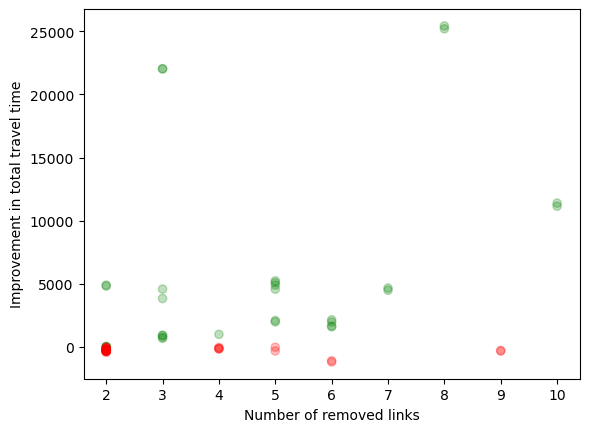

In [ ]:
plt.scatter(results["N Removed Links"], results["Improvement"], color = np.where(results["Improvement"]>0, "green", "red"), alpha=0.25)
plt.xlabel("Number of removed links")
plt.ylabel("Improvement in total travel time")

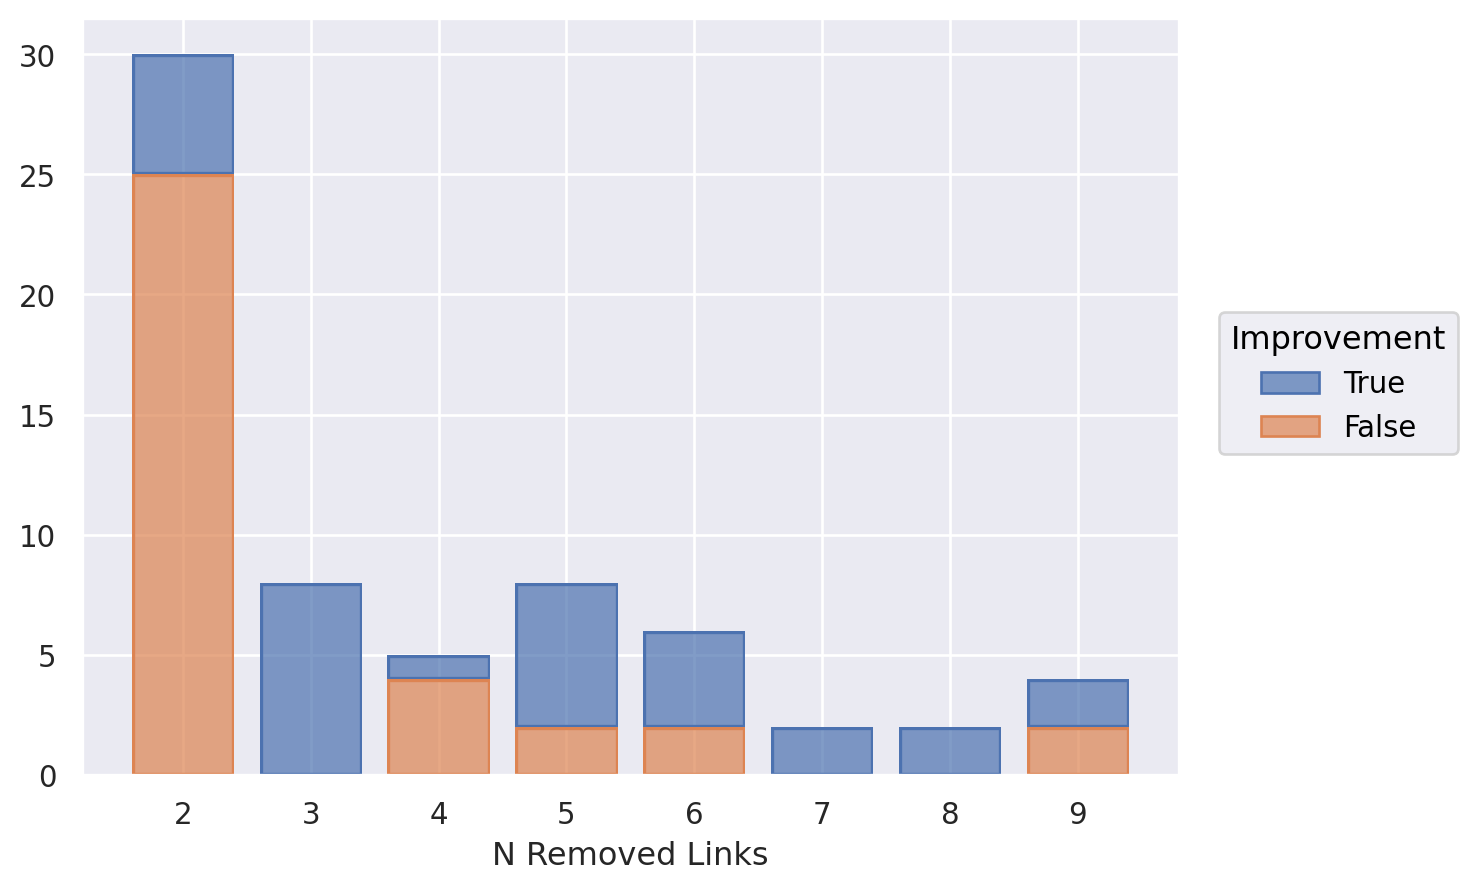

In [ ]:
(
    so.Plot(data=results, x="N Removed Links", color=(results.Improvement>0))
    .add(so.Bar(), so.Hist(), so.Stack(), so.Shift(x=-0.5))
    .label()
    .plot()
)

In [ ]:
results.sort_values("Improvement", ascending=False)

Removed links  N Removed Links  \
o  d                                                                  
12 14          ([38, 40, 64, 66, 70, 71, 74, 75],)                8   
14 12          ([41, 43, 45, 65, 68, 69, 72, 73],)                8   
13 12                              ([41, 72, 73],)                3   
12 13                              ([38, 70, 75],)                3   
   18  ([38, 40, 60, 63, 64, 66, 70, 71, 74, 75],)               10   
...                                            ...              ...   
16 19                                  ([52, 58],)                2   
3  15                                  ([24, 28],)                2   
18 11                                  ([39, 43],)                2   
19 0                    ([2, 13, 16, 18, 53, 59],)                6   
0  19                    ([0, 3, 15, 17, 19, 55],)                6   

       Total Travel Time   Improvement  
o  d                                    
12 14       7.454079e+06  25431.056662  
14 12       7.454306e+06  25203.901283  
13 12       7.457464e+06  22046.200718  
12 13       7.457486e+06  22024.508772  
   18       7.468115e+06  11394.541178  
...                  ...           ...  
16 19       7.479846e+06   -335.499112  
3  15       7.479882e+06   -371.969391  
18 11       7.479925e+06   -414.728589  
19 0        7.480601e+06  -1090.624021  
0  19       7.480691e+06  -1181.135383  

[65 rows x 4 columns]

#### 1 link at a time

In [ ]:
# Remove potential Braess Links for all OD pairs
OD_flows = net.load_flow("OD_flows")
OD_SO_flows = net.load_flow("OD_SO_flows")
results2 = try_removing_braess_1_OD(net, OD_flows, OD_SO_flows)
results2

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0 19 0 6 7482319.498062023 -2809.4582311129197
0 19 3 6 7482319.498062023 -2809.4582311129197
0 19 15 6 7482209.5701529775 -2699.5303220674396
0 19 17 6 7482871.0868401155 -3361.0470092054456
0 19 19 6 7482871.0868401155 -3361.0470092054456
0 19 55 6 7480691.175213638 -1181.1353827277198


  0%|          | 0/2 [00:00<?, ?it/s]

1 4 3 2 7479804.481088652 -294.4412577422336
1 4 14 2 7479804.481088652 -294.4412577422336


  0%|          | 0/2 [00:00<?, ?it/s]

1 8 3 2 7479692.0296095405 -181.98977863043547
1 8 14 2 7479665.520519511 -155.48068860080093


  0%|          | 0/2 [00:00<?, ?it/s]

1 9 3 2 7474682.114229691 4827.925601218827
1 9 14 2 7474644.404850569 4865.63498034142


  0%|          | 0/2 [00:00<?, ?it/s]

1 14 3 2 7479503.802199787 6.237631122581661
1 14 14 2 7479636.46094196 -126.42111105006188


  0%|          | 0/7 [00:00<?, ?it/s]

1 16 3 7 7475083.667400048 4426.372430861928
1 16 15 7 7475025.713998611 4484.325832298957
1 16 17 7 7479794.878959648 -284.8391287382692
1 16 19 7 7479794.878959648 -284.8391287382692
1 16 21 7 7479762.7375185955 -252.69768768548965
1 16 48 7 7475042.934513572 4467.10531733837
1 16 54 7 7479794.878959648 -284.8391287382692


  0%|          | 0/6 [00:00<?, ?it/s]

1 18 3 6 7477423.801250374 2086.2385805360973
1 18 15 6 7477483.655532998 2026.384297912009
1 18 17 6 7480888.643300955 -1378.6034700451419
1 18 19 6 7480888.643300955 -1378.6034700451419
1 18 55 6 7480896.549034926 -1386.509204016067
1 18 60 6 7480896.549034926 -1386.509204016067


  0%|          | 0/6 [00:00<?, ?it/s]

1 21 3 6 7477908.362086533 1601.6777443774045
1 21 15 6 7477838.790809434 1671.2490214761347
1 21 17 6 7480630.967786843 -1120.9279559329152
1 21 19 6 7480630.967786843 -1120.9279559329152
1 21 55 6 7477963.737111478 1546.3027194319293
1 21 62 6 7480969.500842224 -1459.4610113138333


  0%|          | 0/2 [00:00<?, ?it/s]

2 15 24 2 7479954.466382942 -444.4265520321205
2 15 28 2 7479833.23697797 -323.19714706018567


  0%|          | 0/2 [00:00<?, ?it/s]

3 15 24 2 7479814.186475622 -304.14664471149445
3 15 28 2 7479882.009221677 -371.96939076669514


  0%|          | 0/3 [00:00<?, ?it/s]

3 22 9 3 7475591.00013404 3919.0396968703717
3 22 33 3 7475667.174178707 3842.8656522026286
3 22 41 3 7475667.174178707 3842.8656522026286


  0%|          | 0/2 [00:00<?, ?it/s]

4 1 11 2 7479753.929753465 -243.8899225546047
4 1 13 2 7479753.929753465 -243.8899225546047


  0%|          | 0/2 [00:00<?, ?it/s]

4 15 24 2 7479465.922815078 44.11701583210379
4 15 28 2 7479465.922815078 44.11701583210379


  0%|          | 0/5 [00:00<?, ?it/s]

4 20 12 5 7477409.158806308 2100.8810246018693
4 20 24 5 7477443.441211433 2066.598619476892
4 20 27 5 7477292.15172408 2217.888106830418
4 20 45 5 7477449.496129356 2060.5437015537173
4 20 68 5 7477449.496129356 2060.5437015537173


  0%|          | 0/3 [00:00<?, ?it/s]

4 22 9 3 7478817.100063455 692.9397674547508
4 22 33 3 7478817.100063455 692.9397674547508
4 22 41 3 7478817.100063455 692.9397674547508


  0%|          | 0/5 [00:00<?, ?it/s]

5 18 15 5 7474272.573110205 5237.466720704921
5 18 17 5 7481895.4326798 -2385.3928488902748
5 18 19 5 7481895.4326798 -2385.3928488902748
5 18 55 5 7481725.074721878 -2215.0348909683526
5 18 60 5 7481725.074721878 -2215.0348909683526


  0%|          | 0/3 [00:00<?, ?it/s]

5 22 9 3 7478594.419588614 915.6202422957867
5 22 33 3 7478594.419588614 915.6202422957867
5 22 41 3 7478594.419588614 915.6202422957867


  0%|          | 0/5 [00:00<?, ?it/s]

6 12 17 5 7474928.675784205 4581.364046704955
6 12 55 5 7474928.675784205 4581.364046704955
6 12 61 5 7474871.822733977 4638.217096933164
6 12 65 5 7474950.373236427 4559.666594482958
6 12 73 5 7474928.675784205 4581.364046704955


  0%|          | 0/2 [00:00<?, ?it/s]

8 1 11 2 7479892.623123265 -382.5832923548296
8 1 13 2 7479830.570442339 -320.5306114293635


  0%|          | 0/2 [00:00<?, ?it/s]

9 1 11 2 7474777.939333653 4732.100497256964
9 1 13 2 7474608.952409544 4901.087421366014


  0%|          | 0/2 [00:00<?, ?it/s]

10 14 33 2 7479532.296805806 -22.256974896416068
10 14 40 2 7479532.296805806 -22.256974896416068


  0%|          | 0/2 [00:00<?, ?it/s]

10 18 33 2 7479736.348373002 -226.30854209233075
10 18 40 2 7479736.348373002 -226.30854209233075


  0%|          | 0/2 [00:00<?, ?it/s]

10 19 33 2 7479812.679866944 -302.6400360343978
10 19 40 2 7479803.952388145 -293.9125572349876


  0%|          | 0/4 [00:00<?, ?it/s]

10 20 33 4 7478436.747819131 1073.2920117788017
10 20 41 4 7478643.329246108 866.7105848016217
10 20 72 4 7478739.046884279 770.9929466312751
10 20 74 4 7478843.696271997 666.3435589130968


  0%|          | 0/4 [00:00<?, ?it/s]

10 21 33 4 7479635.485136 -125.4453050903976
10 21 40 4 7479659.372905785 -149.33307487517595
10 21 41 4 7479588.288588375 -78.2487574648112
10 21 71 4 7479588.288588375 -78.2487574648112


  0%|          | 0/2 [00:00<?, ?it/s]

11 14 33 2 7479514.517900374 -4.47806946374476
11 14 40 2 7479479.298840512 30.740990398451686


  0%|          | 0/4 [00:00<?, ?it/s]

11 15 24 4 7480083.6177126765 -573.5778817664832
11 15 28 4 7479563.205959935 -53.16612902469933
11 15 31 4 7479824.32065976 -314.2808288503438
11 15 35 4 7479824.32065976 -314.2808288503438


  0%|          | 0/2 [00:00<?, ?it/s]

11 18 33 2 7479542.138354572 -32.098523661494255
11 18 40 2 7479766.408623868 -256.3687929576263


  0%|          | 0/5 [00:00<?, ?it/s]

12 6 38 5 7474612.610210137 4897.4296207726
12 6 53 5 7474612.610210137 4897.4296207726
12 6 59 5 7474612.610210137 4897.4296207726
12 6 63 5 7474652.754262089 4857.285568821244
12 6 74 5 7474418.32616617 5091.713664740324


  0%|          | 0/3 [00:00<?, ?it/s]

12 13 38 3 7457485.5310591925 22024.50877171755
12 13 70 3 7457485.5310591925 22024.50877171755
12 13 75 3 7457485.5310591925 22024.50877171755


  0%|          | 0/8 [00:00<?, ?it/s]

12 14 38 8 7454236.577519198 25273.462311712094
12 14 40 8 7479972.298456883 -462.258625973016
12 14 64 8 7479589.199501359 -79.15967044886202
12 14 66 8 7479048.507797331 461.532033579424
12 14 70 8 7479769.637910662 -259.598079752177
12 14 71 8 7479723.700365199 -213.6605342887342
12 14 74 8 7479589.199501359 -79.15967044886202
12 14 75 8 7479618.842500233 -108.80266932304949


  0%|          | 0/10 [00:00<?, ?it/s]

12 18 38 10 7468108.437782313 11401.602048597299
12 18 40 10 7479608.616214604 -98.57638369407505
12 18 60 10 7479806.870209869 -296.8303789589554
12 18 63 10 7479806.870209869 -296.8303789589554
12 18 64 10 7479729.894606623 -219.85477571282536
12 18 66 10 7479371.913949012 138.1258818982169
12 18 70 10 7479765.831438813 -255.79160790331662
12 18 71 10 7479711.573304144 -201.53347323369235
12 18 74 10 7479797.327747275 -287.2879163650796
12 18 75 10 7479807.314843455 -297.2750125452876


  0%|          | 0/3 [00:00<?, ?it/s]

13 12 41 3 7457463.839112971 22046.200717939064
13 12 72 3 7457463.839112971 22046.200717939064
13 12 73 3 7457463.839112971 22046.200717939064


  0%|          | 0/2 [00:00<?, ?it/s]

14 1 11 2 7479532.893084898 -22.85325398761779
14 1 13 2 7479790.399370999 -280.35954008903354


  0%|          | 0/2 [00:00<?, ?it/s]

14 10 39 2 7479777.252665741 -267.2128348313272
14 10 43 2 7479777.252665741 -267.2128348313272


  0%|          | 0/2 [00:00<?, ?it/s]

14 11 39 2 7479594.76657231 -84.726741399616
14 11 43 2 7479594.76657231 -84.726741399616


  0%|          | 0/8 [00:00<?, ?it/s]

14 12 41 8 7479643.1497544 -133.10992349032313
14 12 43 8 7479801.011333769 -290.9715028591454
14 12 45 8 7479221.900314272 288.13951663766056
14 12 65 8 7479623.400109062 -113.36027815192938
14 12 68 8 7479623.400109062 -113.36027815192938
14 12 69 8 7479661.519070359 -151.479239448905
14 12 72 8 7479685.880578561 -175.84074765071273
14 12 73 8 7454191.462451688 25318.577379222028


  0%|          | 0/2 [00:00<?, ?it/s]

15 2 25 2 7479786.475434998 -276.4356040880084
15 2 47 2 7479786.475434998 -276.4356040880084


  0%|          | 0/2 [00:00<?, ?it/s]

15 3 25 2 7479770.622790435 -260.58295952528715
15 3 47 2 7479770.622790435 -260.58295952528715


  0%|          | 0/2 [00:00<?, ?it/s]

15 4 25 2 7479700.334458031 -190.29462712071836
15 4 47 2 7479700.334458031 -190.29462712071836


  0%|          | 0/4 [00:00<?, ?it/s]

15 11 25 4 7479801.853744204 -291.8139132941142
15 11 26 4 7479820.136703466 -310.0968725560233
15 11 32 4 7479625.176102311 -115.13627140130848
15 11 47 4 7479648.744598955 -138.70476804487407


  0%|          | 0/7 [00:00<?, ?it/s]

16 1 13 7 7474757.4719722485 4752.567858661525
16 1 16 7 7479480.009190209 30.03064070083201
16 1 18 7 7474825.405364543 4684.634466366842
16 1 46 7 7479824.24068365 -314.2008527396247
16 1 49 7 7479480.009190209 30.03064070083201
16 1 51 7 7474905.399575115 4604.64025579486
16 1 53 7 7479480.009190209 30.03064070083201


  0%|          | 0/2 [00:00<?, ?it/s]

16 19 52 2 7479712.964575773 -202.9247448630631
16 19 58 2 7479845.538943231 -335.4991123210639


  0%|          | 0/5 [00:00<?, ?it/s]

16 20 45 5 7479542.789467629 -32.74963671900332
16 20 52 5 7479519.454098449 -9.414267539046705
16 20 56 5 7479428.473714473 81.56611643731594
16 20 58 5 7479672.845983885 -162.8061529751867
16 20 68 5 7479542.789467629 -32.74963671900332


  0%|          | 0/9 [00:00<?, ?it/s]

16 23 41 9 7479943.4505814165 -433.41075050644577
16 23 43 9 7479943.4505814165 -433.41075050644577
16 23 45 9 7479722.670473071 -212.63064216077328
16 23 52 9 7479771.392828885 -261.3529979744926
16 23 56 9 7479872.313614302 -362.2737833922729
16 23 58 9 7479804.359908213 -294.3200773028657
16 23 68 9 7479783.283637454 -273.24380654376
16 23 69 9 7479689.8772557825 -179.83742487244308
16 23 72 9 7479622.711072697 -112.67124178726226


  0%|          | 0/6 [00:00<?, ?it/s]

18 1 13 6 7477478.057423688 2031.982407222502
18 1 16 6 7480792.7996212 -1282.759790290147
18 1 18 6 7477353.784286783 2156.255544126965
18 1 53 6 7480792.7996212 -1282.759790290147
18 1 58 6 7480745.036609773 -1234.9967788625509
18 1 59 6 7480806.000176771 -1295.9603458605707


  0%|          | 0/5 [00:00<?, ?it/s]

18 5 16 5 7481981.43535333 -2471.3955224202946
18 5 18 5 7474416.415448616 5093.624382293783
18 5 53 5 7481981.43535333 -2471.3955224202946
18 5 58 5 7482241.611570814 -2731.571739903651
18 5 59 5 7481841.277062047 -2331.237231137231


  0%|          | 0/2 [00:00<?, ?it/s]

18 10 39 2 7479828.746448871 -318.70661796070635
18 10 43 2 7479828.746448871 -318.70661796070635


  0%|          | 0/2 [00:00<?, ?it/s]

18 11 39 2 7479924.768419415 -414.72858850471675
18 11 43 2 7479924.768419415 -414.72858850471675


  0%|          | 0/10 [00:00<?, ?it/s]

18 12 41 10 7479502.65169201 7.388138899579644
18 12 43 10 7479847.075853616 -337.0360227059573
18 12 45 10 7479676.156234007 -166.11640309728682
18 12 58 10 7479570.921012785 -60.88118187524378
18 12 61 10 7479570.921012785 -60.88118187524378
18 12 65 10 7479707.213017773 -197.17318686284125
18 12 68 10 7479669.797627628 -159.75779671780765
18 12 69 10 7479725.866256995 -215.82642608508468
18 12 72 10 7479966.195048602 -456.155217692256
18 12 73 10 7468075.655202234 11434.384628675878


  0%|          | 0/2 [00:00<?, ?it/s]

18 20 58 2 7479602.913043676 -92.87321276590228
18 20 61 2 7479682.937468701 -172.8976377910003


  0%|          | 0/2 [00:00<?, ?it/s]

18 23 58 2 7479555.3892203355 -45.349389425478876
18 23 61 2 7479550.814620437 -40.7747895270586


  0%|          | 0/6 [00:00<?, ?it/s]

19 0 2 6 7482156.9784872215 -2646.938656311482
19 0 13 6 7482156.9784872215 -2646.938656311482
19 0 16 6 7482876.746939839 -3366.707108928822
19 0 18 6 7482301.504847078 -2791.465016167611
19 0 53 6 7482876.746939839 -3366.707108928822
19 0 59 6 7480600.663852253 -1090.6240213429555


  0%|          | 0/2 [00:00<?, ?it/s]

19 10 39 2 7479715.819723756 -205.77989284601063
19 10 43 2 7479715.85604103 -205.81621011998504


  0%|          | 0/2 [00:00<?, ?it/s]

19 16 57 2 7479942.929064795 -432.88923388533294
19 16 60 2 7479825.216389581 -315.17655867058784


  0%|          | 0/5 [00:00<?, ?it/s]

20 4 22 5 7477577.6409494765 1932.3988814335316
20 4 25 5 7477289.471910974 2220.567919936031
20 4 42 5 7477289.471910974 2220.567919936031
20 4 64 5 7477320.198169723 2189.841661186889
20 4 66 5 7477468.229631052 2041.8101998576894


  0%|          | 0/5 [00:00<?, ?it/s]

20 16 44 5 7479710.477582728 -200.43775181751698
20 16 57 5 7479736.43684476 -226.3970138495788
20 16 60 5 7479636.657639221 -126.61780831124634
20 16 64 5 7479707.414958435 -197.37512752506882
20 16 66 5 7479707.414958435 -197.37512752506882


  0%|          | 0/2 [00:00<?, ?it/s]

20 18 60 2 7479544.207055362 -34.16722445189953
20 18 63 2 7479650.485649201 -140.44581829104573


  0%|          | 0/6 [00:00<?, ?it/s]

21 1 13 6 7477844.178320137 1665.8615107731894
21 1 16 6 7480858.787921985 -1348.748091074638
21 1 18 6 7477844.178320137 1665.8615107731894
21 1 53 6 7480858.787921985 -1348.748091074638
21 1 59 6 7477915.920902778 1594.1189281316474
21 1 67 6 7480901.856057053 -1391.81622614339


  0%|          | 0/4 [00:00<?, ?it/s]

21 10 39 4 7479625.844753094 -115.80492218397558
21 10 43 4 7479715.255445439 -205.21561452932656
21 10 69 4 7479666.918869068 -156.87903815787286
21 10 70 4 7479666.918869068 -156.87903815787286


  0%|          | 0/3 [00:00<?, ?it/s]

22 3 30 3 7474923.053818788 4586.9860121216625
22 3 39 3 7474923.053818788 4586.9860121216625
22 3 70 3 7474923.053818788 4586.9860121216625


  0%|          | 0/3 [00:00<?, ?it/s]

22 4 30 3 7478544.72156959 965.3182613197714
22 4 39 3 7478584.151569875 925.8882610350847
22 4 70 3 7478584.151569875 925.8882610350847


  0%|          | 0/3 [00:00<?, ?it/s]

22 5 30 3 7478521.672629858 988.3672010516748
22 5 39 3 7478752.352487301 757.687343608588
22 5 70 3 7478752.352487301 757.687343608588


  0%|          | 0/9 [00:00<?, ?it/s]

23 16 40 9 7479749.625876611 -239.58604570105672
23 16 44 9 7479933.629984796 -423.5901538860053
23 16 57 9 7479656.183488091 -146.14365718141198
23 16 60 9 7479627.75939247 -117.71956156007946
23 16 64 9 7479714.608034856 -204.5682039456442
23 16 66 9 7479921.6860001255 -411.64616921544075
23 16 70 9 7479749.625876611 -239.58604570105672
23 16 71 9 7479932.907700799 -422.86786988936365
23 16 75 9 7479757.1750541795 -247.13522326946259


  0%|          | 0/2 [00:00<?, ?it/s]

23 18 60 2 7479587.642619138 -77.60278822761029
23 18 63 2 7479558.00369126 -47.96386034972966


AttributeError: 'list' object has no attribute 'set_index'